In [1]:
import pandas as pd
#import numpy as np
from TSForecasting.TsForecasting import TimeSeriesForecast

Using TensorFlow backend.


In [2]:
def trainingData():
    """
    Reading Train Data 
    input:
        none
    output:
        data: training dataframe with index => DisplayTime value => GlucoseValues
    """
    
    data = pd.read_csv("~/Desktop/NCSA_genomics/Data/data_hall.txt", sep="\t", engine="python") #use your path
    #data.head()
    
    
    #dropping columns we don't need
    
    
    data.drop(['subjectId', 'Internal Time'], axis=1, inplace=True)
    
    #Converting the Display Time to 'datetime' so that it can be used as an index
    data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    data = data.set_index(['Display Time'], drop=True)
    #data.head()
    
    return data

def testingData():
    """
    Reading Test Data 
    input:
        none
    output:
        data: testing dataframe with index => DisplayTime value => GlucoseValues
    """
    #reading datasets for training
    diabetic_1 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID01.csv")
    diabetic_2 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID11.csv")
    prediabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID21.csv")
    nondiabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID29.csv")
    
    #Converting the Display Time to 'timeStamp' so that it can be used as an index
    diabetic_1['timeStamp'] = diabetic_1['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_1 = diabetic_1.set_index(['timeStamp'], drop=True)
    
    prediabetic['timeStamp'] = prediabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    prediabetic = prediabetic.set_index(['timeStamp'], drop=True)
    
    nondiabetic['timeStamp'] = nondiabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    nondiabetic = nondiabetic.set_index(['timeStamp'], drop=True)
    
    diabetic_2['timeStamp'] = diabetic_2['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_2 = diabetic_2.set_index(['timeStamp'], drop=True)
    
    return diabetic_1, diabetic_2, prediabetic, nondiabetic


In [3]:
train_set = trainingData()
test_set = testingData()


obj = TimeSeriesForecast()
obj.connectivityTester()

We are connected!


In [4]:
lstmModel = obj.trainModel(train_set)

Train shape:  (105425, 1, 1)


501/501 [==============================] - 1s 1ms/step
LSTM: 0.231304


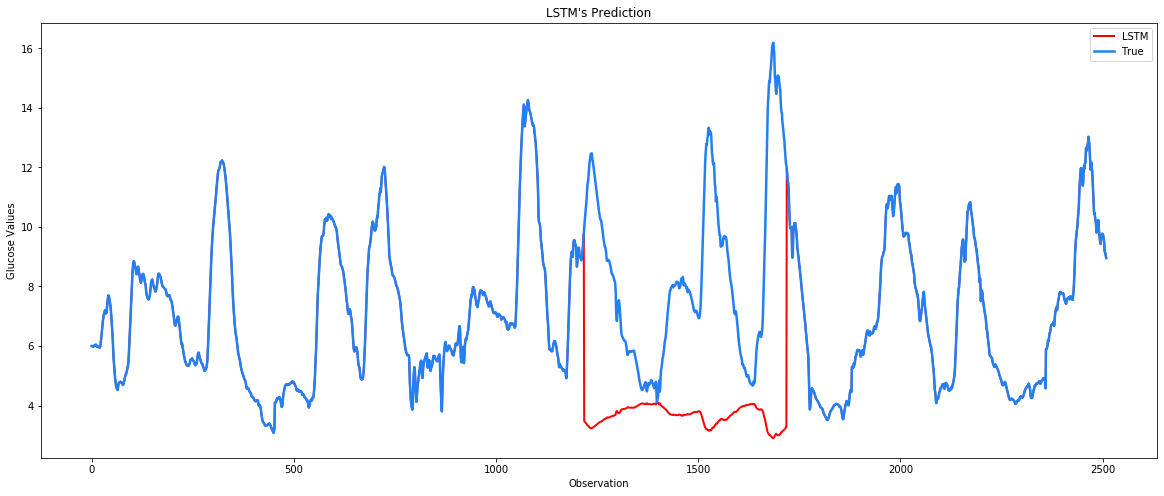

Index of Agreement is: 0.397
Mean Absolute Error is: 4.7295576005200894
Root Mean Squared Error is: 5.806
Mean Absolute Difference is: [0.34219384]
Fractional Bias is: 0.703
Mean Absolute Percentage Error is: 49.0


In [5]:
diabetic_1, diabetic_2 , prediabetic, non_diabetic = testingData()#these time series' data will be used to plot comparison graphs
diabetic_1_faulty, diabetic_2_faulty, prediabetic_faulty, non_diabetic_faulty = testingData()#gaps will be introduced in these time series' for imputations 

start, end = obj.createGap(diabetic_1)
gap_tester_diabetic_1 = diabetic_1.iloc[start:end+2]
diabetic_1_faulty = obj.faultyData(diabetic_1_faulty,start,end+1)

#here, we're actually running the model and getting the imputed values for the gap
predicted, true = obj.testModel(lstmModel,gap_tester_diabetic_1)
#here we are are filling in the gap we created with imputed values generated by the model
for i in range(0,501):
     diabetic_1_faulty['glucoseValue'][start+i] = predicted[i][0]

obj.plot(diabetic_1_faulty['glucoseValue'].tolist(),diabetic_1['glucoseValue'].tolist())
obj.getMetrics(predicted,true)